Если вам удобнее проверять с помощью Гитхаба, можете перейти по ссылочке <br>

https://github.com/ExuberantSebastian/HW_MS/tree/main
<br>

Расслабляющая музыка для проверки <br>
https://youtu.be/0-NW47sXur0

In [30]:
# Импорт необходимых библиотек

import pandas as pd 
import numpy as np
import random 
import scipy.stats as sts
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

Имя мне - Семенов Всеволод Алексеевич, потому параметры будут иметь следующий вид: <br>
a_1 = 19; b_1 = 3;  c_1 = 1<br>
a_2 = 6;  b_2 = 19; c_2 = 13<br>
a_3 = 14; b_3 = 6;  c_3 = 6<br>


In [31]:
# Параметры в код
a_1 = 19 
b_1 = 3
c_1 = 1
a_2 = 6
b_2 = 19
c_2 = 13
a_3 = 14
b_3 = 6
c_3 = 6
n = 100

## Задание 1 ##

### Пункт 1 ###

In [211]:
# Равномерное
unif_rv = sts.uniform(loc=-a_1, scale=(a_2+a_1))
U = unif_rv.rvs(100)

# Нормальное
norm_rv = sts.norm(loc=b_1, scale=np.sqrt(b_2))
N = norm_rv.rvs(100)

# Показательное
Exp_rv = sts.expon(scale=c_1)
Exp = Exp_rv.rvs(100)

In [33]:
# Пункт 4 для равномерного

max_U = np.array(U).max()
min_U = np.array(U).min()
mean_U = np.array(U).mean()
std_U = np.array(U).std()
median_U = np.median(np.array(U))

(max_U, min_U), mean_U, std_U, median_U

((5.996963109460086, -18.82219795146116),
 -4.892450823223738,
 7.547191871377937,
 -5.088257478175503)

In [34]:
# Пункт 4 для нормального

max_N = np.array(N).max()
min_N = np.array(N).min()
mean_N = np.array(N).mean()
std_N = np.array(N).std()
median_N = np.median(np.array(N))

(max_N, min_N), mean_N, std_N, median_N

((15.76486566573288, -10.652249698801265),
 2.8269636449033704,
 4.8172301362244525,
 2.8151513311460823)

In [212]:
# Пункт 4 для показательного

max_Exp = np.array(Exp).max()
min_Exp = np.array(Exp).min()
mean_Exp = np.array(Exp).mean()
std_Exp = np.array(Exp).std()
median_Exp = np.median(np.array(Exp))

(max_Exp, min_Exp), mean_Exp, std_Exp, median_Exp

((4.5390461408302, 0.003721468791780063),
 0.955769415243394,
 0.957817581507239,
 0.6434451737401441)

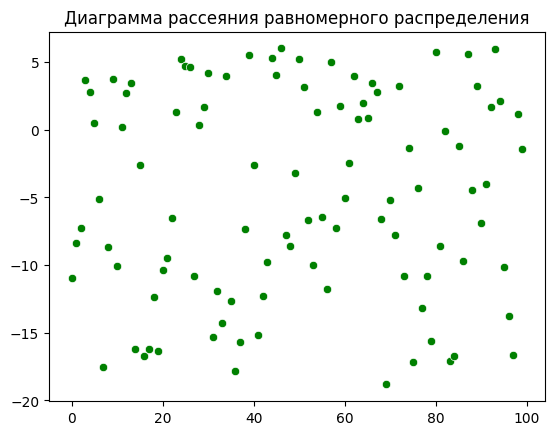

In [36]:
# 5
sns.scatterplot(U, color='green').set(title='Диаграмма рассеяния равномерного распределения');

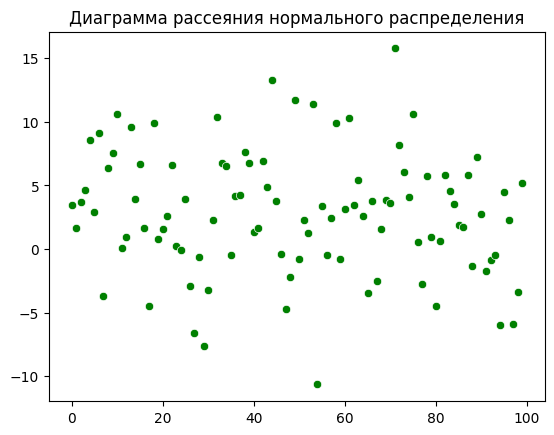

In [37]:
sns.scatterplot(N, color='green').set(title='Диаграмма рассеяния нормального распределения');

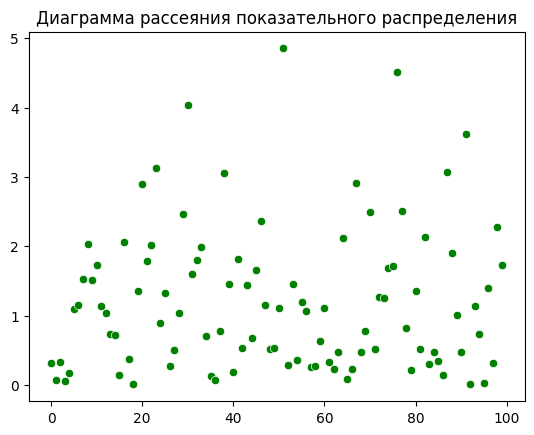

In [38]:
sns.scatterplot(Exp, color='green').set(title='Диаграмма рассеяния показательного распределения');

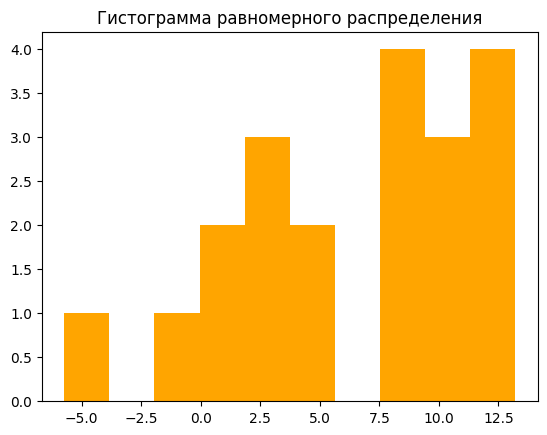

In [177]:
# 6

plt.hist(U, bins=10, color='orange')
plt.title('Гистограмма равномерного распределения');

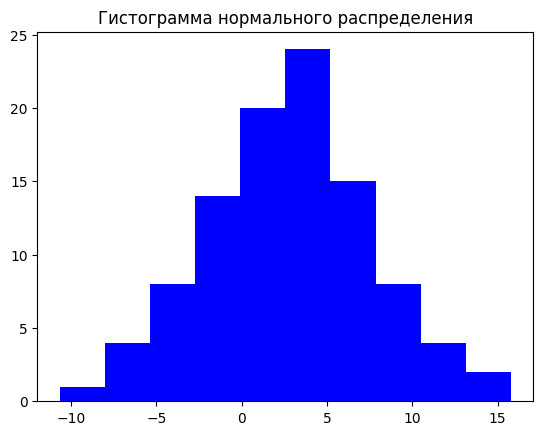

In [40]:
plt.hist(N, bins=10, color='blue')
plt.title('Гистограмма нормального распределения');

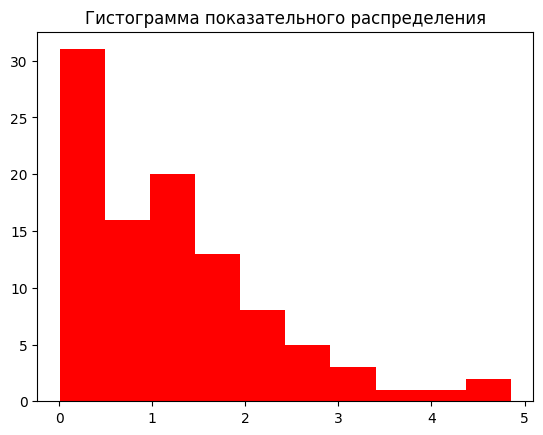

In [41]:
plt.hist(Exp, bins=10, color='red')
plt.title('Гистограмма показательного распределения');

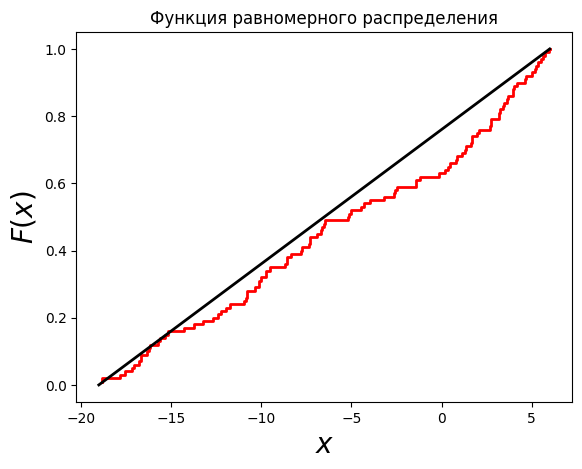

In [42]:
# 7
from statsmodels.distributions.empirical_distribution import ECDF

# Выборочная CDF
ecdf = ECDF(U)  

plt.step(ecdf.x, ecdf.y, color='red', linewidth=2)
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20)
plt.title('Функция равномерного распределения');

# Теоретическа cdf 
x = np.linspace(-19, 6, 100)

cdf = unif_rv.cdf(x)
plt.plot(x, cdf, color='black', linewidth=2);

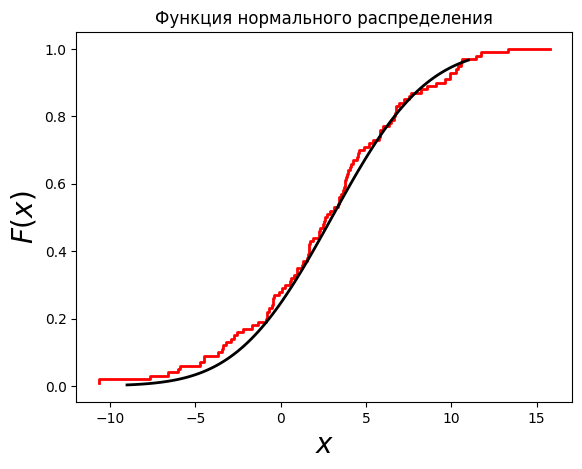

In [43]:
# Выборочная CDF
ecdf = ECDF(N)  

plt.step(ecdf.x, ecdf.y, color='red', linewidth=2)
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20)
plt.title('Функция нормального распределения');

# Теоретическа cdf 
x = np.linspace(-9, 11, 100)

cdf = norm_rv.cdf(x)
plt.plot(x, cdf, color='black', linewidth=2);

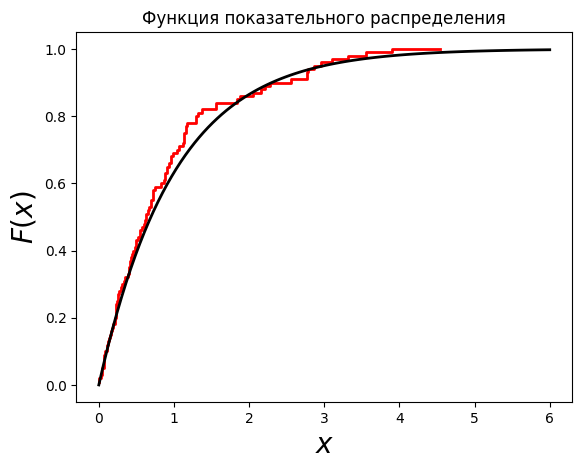

In [213]:
ecdf = ECDF(Exp)  

plt.step(ecdf.x, ecdf.y, color='red', linewidth=2)
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20)
plt.title('Функция показательного распределения');

# Теоретическа cdf 
x = np.linspace(0, 6, 100)

cdf = Exp_rv.cdf(x)
plt.plot(x, cdf, color='black', linewidth=2);

Как мы видим, графики довольно таки похожи, скорее всего асимптотически сходятся 

### Пункт 2 ###

In [45]:
n=20
unif_rv = sts.uniform(loc=-a_2, scale=(a_2+a_3))
mean_list = []

for i in range(100):
    U = unif_rv.rvs(n)
    U_mean = np.array(U).mean()
    mean_list.append(U_mean)


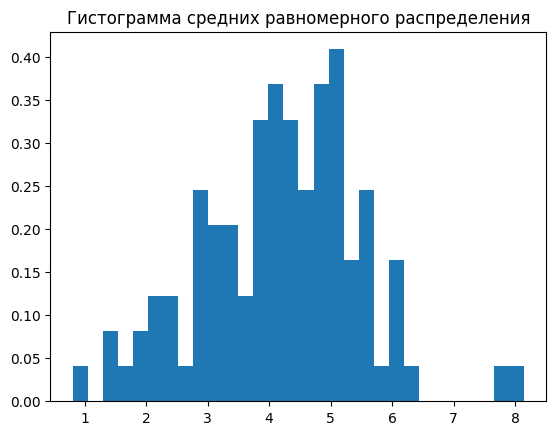

In [46]:
plt.hist(mean_list, bins=30, density=True)
plt.title('Гистограмма средних равномерного распределения');


Наглядно наблюдается работа ЦПТ, если увеличить количество прогонов, то наверняка всё сойдётся к нормальному, давайте убедимся

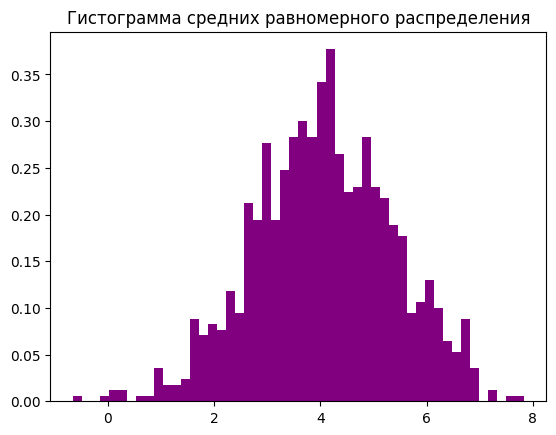

In [47]:
n=20
unif_rv = sts.uniform(loc=-a_2, scale=(a_2+a_3))
mean_list = []

for i in range(1000):
    U = unif_rv.rvs(n)
    U_mean = np.array(U).mean()
    mean_list.append(U_mean)

plt.hist(mean_list, bins=50, density=True, color='purple')
plt.title('Гистограмма средних равномерного распределения');

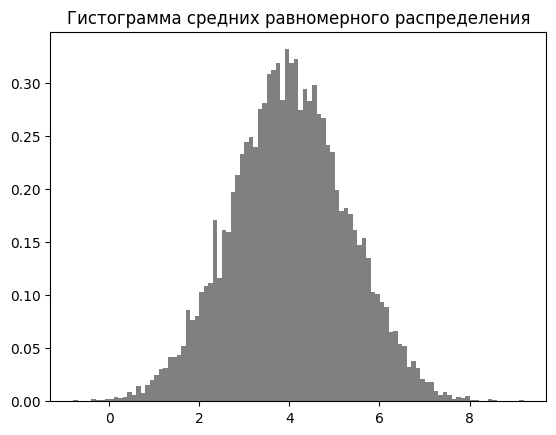

In [48]:
n=20
unif_rv = sts.uniform(loc=-a_2, scale=(a_2+a_3))
mean_list = []

for i in range(10000):
    U = unif_rv.rvs(n)
    U_mean = np.array(U).mean()
    mean_list.append(U_mean)

plt.hist(mean_list, bins=100, density=True, color='grey')
plt.title('Гистограмма средних равномерного распределения');

### Пункт 3 ###

In [49]:
df = pd.read_excel('http://pubdocs.worldbank.org/en/561011486076393416/CMO-Historical-Data-Monthly.xlsx', index_col=0)
df

""


По крайней мере я попытался, нет так нет, эта часть была сделана в экселе, файл в архиве, вот скриншотик с импровизированной корреляционной матрицей <br>

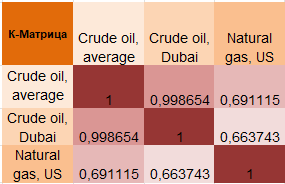

Если подводить какие-то выводы по этому поводу, то стоит сказать, что у всех активов присутствует положительная корелляция, у нефти она вообще почти равна единице, однако для вывода о взаимосвязи по-хорошему нужно провести тест Пирсона-Фишера

## Задание 2 ##

### Пункт 1 ###

In [50]:
# 1 

# Равномерное
unif_rv = sts.uniform(loc=c_3, scale=c_2)
U_1 = unif_rv.rvs(100)
U_2 = unif_rv.rvs(300)
U_3 = unif_rv.rvs(1000)

# Нормальное
norm_rv = sts.norm(loc=a_1, scale=np.sqrt(a_3))
N_1 = norm_rv.rvs(100)
N_2 = norm_rv.rvs(300)
N_3 = norm_rv.rvs(1000)

# Показательное
Exp_rv = sts.expon(scale=b_2)
Exp_1 = Exp_rv.rvs(100)
Exp_2 = Exp_rv.rvs(300)
Exp_3 = Exp_rv.rvs(1000)

### Пункт 2... ###

#### Подпункт 1... ####

Цикл неудобно будет проверять, потому сделал по-старинке

In [51]:
# Для нормального
alpha_1 = 0.1
alpha_2 = 0.05
z_crit_1 = sts.norm.ppf(1 - alpha_1/2)
z_crit_2 = sts.norm.ppf(1 - alpha_2/2)

In [52]:
# 90
(np.array(N_1).mean() - z_crit_1*np.sqrt(a_3)/np.sqrt(100), np.array(N_1).mean() + z_crit_1*np.sqrt(a_3)/np.sqrt(100))

(17.891598874317726, 19.122494619006705)

In [53]:
# 95
(np.array(N_1).mean() - z_crit_2*np.sqrt(a_3)/np.sqrt(100), np.array(N_1).mean() + z_crit_2*np.sqrt(a_3)/np.sqrt(100))

(17.773695374605698, 19.240398118718733)

In [54]:
# 90
(np.array(N_2).mean() - z_crit_1*np.sqrt(a_3)/np.sqrt(300), np.array(N_2).mean() + z_crit_1*np.sqrt(a_3)/np.sqrt(300))

(18.624176606313352, 19.334834595853895)

In [55]:
# 95
(np.array(N_2).mean() - z_crit_2*np.sqrt(a_3)/np.sqrt(300), np.array(N_2).mean() + z_crit_2*np.sqrt(a_3)/np.sqrt(300))

(18.556104989016212, 19.402906213151034)

In [56]:
# 90
(np.array(N_3).mean() - z_crit_1*np.sqrt(a_3)/np.sqrt(1000), np.array(N_3).mean() + z_crit_1*np.sqrt(a_3)/np.sqrt(1000))

(18.696100398374615, 19.085343809917244)

In [57]:
# 95
(np.array(N_3).mean() - z_crit_2*np.sqrt(a_3)/np.sqrt(1000), np.array(N_3).mean() + z_crit_2*np.sqrt(a_3)/np.sqrt(1000))

(18.658816038055114, 19.122628170236744)

Сначала найдём дисперсию

In [58]:
# Для равномерного
var = c_2**2/12
var

14.083333333333334

In [59]:
# 90
(np.array(U_1).mean() - z_crit_1*np.sqrt(var)/np.sqrt(100), np.array(U_1).mean() + z_crit_1*np.sqrt(var)/np.sqrt(100))

(11.685484342704395, 12.92003803229175)

In [60]:
# 95
(np.array(U_1).mean() - z_crit_2*np.sqrt(var)/np.sqrt(100), np.array(U_1).mean() + z_crit_2*np.sqrt(var)/np.sqrt(100))

(11.567230460348561, 13.038291914647584)

In [61]:
# 90
(np.array(U_2).mean() - z_crit_1*np.sqrt(var)/np.sqrt(300), np.array(U_2).mean() + z_crit_1*np.sqrt(var)/np.sqrt(300))

(11.985262222520815, 12.69803212753312)

In [62]:
# 95
(np.array(U_2).mean() - z_crit_2*np.sqrt(var)/np.sqrt(300), np.array(U_2).mean() + z_crit_2*np.sqrt(var)/np.sqrt(300))

(11.916988311709956, 12.766306038343979)

In [63]:
# 90
(np.array(U_3).mean() - z_crit_1*np.sqrt(var)/np.sqrt(1000), np.array(U_2).mean() + z_crit_1*np.sqrt(var)/np.sqrt(1000))

(12.204751504789606, 12.536847252669993)

In [64]:
# 95
(np.array(U_3).mean() - z_crit_2*np.sqrt(var)/np.sqrt(1000), np.array(U_2).mean() + z_crit_2*np.sqrt(var)/np.sqrt(1000))

(12.1673563437494, 12.574242413710198)

Найдём дисперсию

In [65]:
# Для показательного 
var = (1/b_2)**2
var

0.0027700831024930744

In [66]:
# 90
(np.array(Exp_1).mean() - z_crit_1*np.sqrt(var)/np.sqrt(100), np.array(Exp_1).mean() + z_crit_1*np.sqrt(var)/np.sqrt(100))

(16.43795547139313, 16.45526972009788)

In [67]:
# 95
(np.array(Exp_1).mean() - z_crit_2*np.sqrt(var)/np.sqrt(100), np.array(Exp_1).mean() + z_crit_2*np.sqrt(var)/np.sqrt(100))

(16.436296995826876, 16.456928195664137)

In [68]:
# 90
(np.array(Exp_2).mean() - z_crit_1*np.sqrt(var)/np.sqrt(300), np.array(Exp_2).mean() + z_crit_1*np.sqrt(var)/np.sqrt(300))

(19.16575981862732, 19.175756204777823)

In [69]:
# 95
(np.array(Exp_2).mean() - z_crit_2*np.sqrt(var)/np.sqrt(300), np.array(Exp_2).mean() + z_crit_2*np.sqrt(var)/np.sqrt(300))

(19.164802297312697, 19.176713726092444)

In [70]:
# 90
(np.array(Exp_3).mean() - z_crit_1*np.sqrt(var)/np.sqrt(1000), np.array(Exp_3).mean() + z_crit_1*np.sqrt(var)/np.sqrt(1000))

(19.206217294333026, 19.211692540521188)

In [71]:
# 95
(np.array(Exp_3).mean() - z_crit_2*np.sqrt(var)/np.sqrt(1000), np.array(Exp_3).mean() + z_crit_2*np.sqrt(var)/np.sqrt(1000))

(19.205692838309716, 19.212216996544498)

#### Подпункт 2... ####

Тут стоит пояснить, что я умею использовать Стьюдента, но намерено этого не сделаю, ибо у нас большое количество наблюдений, а значит и степеней свободы, что приближает его к нормальному

In [72]:
# Для нормального
N_1 = np.array(N_1)
N_2 = np.array(N_2)
N_3 = np.array(N_3)

In [73]:
# 90
(np.array(N_1).mean() - z_crit_1 * N_1.std() / np.sqrt(100), np.array(N_1).mean() + z_crit_1 * N_1.std() / np.sqrt(100))

(17.950048967576784, 19.064044525747647)

In [74]:
# 95
(np.array(N_1).mean() - z_crit_2 * N_1.std() / np.sqrt(100), np.array(N_1).mean() + z_crit_2 * N_1.std() / np.sqrt(100))

(17.843342956496056, 19.170750536828375)

In [75]:
# 90
(np.array(N_2).mean() - z_crit_1 * N_2.std() / np.sqrt(300), np.array(N_2).mean() + z_crit_1 * N_2.std() / np.sqrt(300))

(18.626570389772738, 19.33244081239451)

In [76]:
# 95
(np.array(N_2).mean() - z_crit_2 * N_2.std() / np.sqrt(300), np.array(N_2).mean() + z_crit_2 * N_2.std() / np.sqrt(300))

(18.558957357938475, 19.400053844228772)

In [77]:
# 90
(np.array(N_3).mean() - z_crit_1 * N_3.std() / np.sqrt(1000), np.array(N_3).mean() + z_crit_1 * N_3.std() / np.sqrt(1000))

(18.70082312694379, 19.08062108134807)

In [78]:
# 95
(np.array(N_3).mean() - z_crit_2 * N_3.std() / np.sqrt(1000), np.array(N_3).mean() + z_crit_2 * N_3.std() / np.sqrt(1000))

(18.664443516240812, 19.117000692051047)

Для равномерного

In [79]:
# 90
(np.array(U_1).mean() - z_crit_1 * U_1.std() / np.sqrt(100), np.array(U_1).mean() + z_crit_1 * U_1.std() / np.sqrt(100))

(11.683390426619189, 12.922131948376956)

In [80]:
# 95
(np.array(U_1).mean() - z_crit_2 * U_1.std() / np.sqrt(100), np.array(U_1).mean() + z_crit_2 * U_1.std() / np.sqrt(100))

(11.564735405441299, 13.040786969554846)

In [81]:
# 90
(np.array(U_2).mean() - z_crit_1 * U_2.std() / np.sqrt(300), np.array(U_2).mean() + z_crit_1 * U_2.std() / np.sqrt(300))

(11.989763998128891, 12.693530351925043)

In [82]:
# 95
(np.array(U_2).mean() - z_crit_2 * U_2.std() / np.sqrt(300), np.array(U_2).mean() + z_crit_2 * U_2.std() / np.sqrt(300))

(11.922352508203636, 12.760941841850299)

In [83]:
# 90
(np.array(U_3).mean() - z_crit_1 * U_3.std() / np.sqrt(1000), np.array(U_3).mean() + z_crit_1 * U_3.std() / np.sqrt(1000))

(12.205698359360584, 12.59420480550468)

In [84]:
# 95
(np.array(U_3).mean() - z_crit_2 * U_3.std() / np.sqrt(1000), np.array(U_3).mean() + z_crit_2 * U_3.std() / np.sqrt(1000))

(12.168484590559517, 12.631418574305746)

Для экспоненциального

In [85]:
# 90
(np.array(Exp_1).mean() - z_crit_1 * Exp_1.std() / np.sqrt(100), np.array(Exp_1).mean() + z_crit_1 * Exp_1.std() / np.sqrt(100))

(13.57762525982514, 19.315599931665872)

In [86]:
# 95
(np.array(Exp_1).mean() - z_crit_2 * Exp_1.std() / np.sqrt(100), np.array(Exp_1).mean() + z_crit_2 * Exp_1.std() / np.sqrt(100))

(13.028003329626697, 19.865221861864317)

In [87]:
# 90
(np.array(Exp_2).mean() - z_crit_1 * Exp_2.std() / np.sqrt(300), np.array(Exp_2).mean() + z_crit_1 * Exp_2.std() / np.sqrt(300))

(17.46030016092593, 20.881215862479213)

In [88]:
# 95
(np.array(Exp_2).mean() - z_crit_2 * Exp_2.std() / np.sqrt(300), np.array(Exp_2).mean() + z_crit_2 * Exp_2.std() / np.sqrt(300))

(17.13262177291194, 21.208894250493202)

In [89]:
# 90
(np.array(Exp_3).mean() - z_crit_1 * Exp_3.std() / np.sqrt(1000), np.array(Exp_3).mean() + z_crit_1 * Exp_3.std() / np.sqrt(1000))

(18.212578936532097, 20.205330898322117)

In [90]:
# 95
(np.array(Exp_3).mean() - z_crit_2 * Exp_3.std() / np.sqrt(1000), np.array(Exp_3).mean() + z_crit_2 * Exp_3.std() / np.sqrt(1000))

(18.021699707834767, 20.396210127019447)

#### Подпункт 3... ####

In [91]:
# Предварительное приготовление

Chi_crit_1 = sts.chi2.ppf(0.9, df=100)
Chi_crit_12 = sts.chi2.ppf(0.95, df=100)

Chi_crit_2 = sts.chi2.ppf(0.9, df=300)
Chi_crit_22 = sts.chi2.ppf(0.95, df=300)

Chi_crit_3 = sts.chi2.ppf(0.9, df=1000)
Chi_crit_32 = sts.chi2.ppf(0.95, df=1000)

# Для нормального
N1 = ((np.array(N_1) - a_1)**2).sum()
N2 = ((np.array(N_2) - a_1)**2).sum()
N3 = ((np.array(N_3) - a_1)**2).sum()

In [92]:
# 90

'D:', (N1 / Chi_crit_1, N1 / sts.chi2.ppf(0.1, df=100)), 'STD:', (np.sqrt(N1 / Chi_crit_1), np.sqrt(N1 / sts.chi2.ppf(0.1, df=100)))

('D:',
 (9.882083417530957, 14.218475769531894),
 'STD:',
 (3.1435781233382696, 3.7707394194682684))

In [93]:
# 95

'D:', (N1 / Chi_crit_12, N1 / sts.chi2.ppf(0.05, df=100)), 'STD:', (np.sqrt(N1 / Chi_crit_12), np.sqrt(N1 / sts.chi2.ppf(0.05, df=100)))

('D:',
 (9.417623091760223, 15.02650064378326),
 'STD:',
 (3.068814606938683, 3.8764030548671355))

In [94]:
# 90

'D:', (N2 / Chi_crit_2, N2 / sts.chi2.ppf(0.1, df=300)), 'STD:', (np.sqrt(N2 / Chi_crit_2), np.sqrt(N2 / sts.chi2.ppf(0.1, df=300)))

('D:',
 (12.489062104538943, 15.400306139875353),
 'STD:',
 (3.533986715388011, 3.9243223797077826))

In [95]:
# 95

'D:', (N2 / Chi_crit_22, N2 / sts.chi2.ppf(0.05, df=300)), 'STD:', (np.sqrt(N2 / Chi_crit_22), np.sqrt(N2 / sts.chi2.ppf(0.05, df=300)))

('D:',
 (12.137629630422534, 15.883767357657396),
 'STD:',
 (3.483910106535835, 3.985444436654135))

In [96]:
# 90

'D:', (N3 / Chi_crit_3, N3 / sts.chi2.ppf(0.1, df=1000)), 'STD:', (np.sqrt(N3 / Chi_crit_3), np.sqrt(N3 / sts.chi2.ppf(0.1, df=1000)))

('D:',
 (12.612678992372876, 14.14512928866124),
 'STD:',
 (3.551433371523796, 3.7610011019223646))

In [97]:
# 95

'D:', (N3 / Chi_crit_32, N3 / sts.chi2.ppf(0.05, df=1000)), 'STD:', (np.sqrt(N3 / Chi_crit_32), np.sqrt(N3 / sts.chi2.ppf(0.05, df=1000)))

('D:',
 (12.413684885795734, 14.38207535806774),
 'STD:',
 (3.5233059597196115, 3.792370677830391))

Для равномерного

In [98]:
#Для равномерного

N1 = ((np.array(U_1) - ((c_3 + c_2 + c_3)/2))**2).sum()
N2 = ((np.array(U_2) - ((c_3 + c_2 + c_3)/2))**2).sum()
N3 = ((np.array(U_3) - ((c_3 + c_2 + c_3)/2))**2).sum()

In [99]:
# 90

'D:', (N1 / Chi_crit_1, N1 / sts.chi2.ppf(0.1, df=100)), 'STD:', (np.sqrt(N1 / Chi_crit_1), np.sqrt(N1 / sts.chi2.ppf(0.1, df=100)))

('D:',
 (11.998467967107162, 17.26355858919093),
 'STD:',
 (3.4638804781786514, 4.15494387316976))

In [100]:
# 95

'D:', (N1 / Chi_crit_12, N1 / sts.chi2.ppf(0.05, df=100)), 'STD:', (np.sqrt(N1 / Chi_crit_12), np.sqrt(N1 / sts.chi2.ppf(0.05, df=100)))

('D:',
 (11.43453705241097, 18.24463314206625),
 'STD:',
 (3.381499231466861, 4.271373683262358))

In [101]:
# 90

'D:', (N2 / Chi_crit_2, N2 / sts.chi2.ppf(0.1, df=300)), 'STD:', (np.sqrt(N2 / Chi_crit_2), np.sqrt(N2 / sts.chi2.ppf(0.1, df=300)))

('D:',
 (12.437013532056458, 15.336124863197862),
 'STD:',
 (3.5266150246456527, 3.9161364714725995))

In [102]:
# 95

'D:', (N2 / Chi_crit_22, N2 / sts.chi2.ppf(0.05, df=300)), 'STD:', (np.sqrt(N2 / Chi_crit_22), np.sqrt(N2 / sts.chi2.ppf(0.05, df=300)))

('D:',
 (12.087045664205005, 15.817571240631962),
 'STD:',
 (3.4766428726869556, 3.9771310313631814))

In [103]:
# 90

'D:', (N3 / Chi_crit_3, N3 / sts.chi2.ppf(0.1, df=1000)), 'STD:', (np.sqrt(N3 / Chi_crit_3), np.sqrt(N3 / sts.chi2.ppf(0.1, df=1000)))

('D:',
 (13.195359084716731, 14.79860546490556),
 'STD:',
 (3.6325416838237015, 3.846895561996135))

In [104]:
# 95

'D:', (N3 / Chi_crit_32, N3 / sts.chi2.ppf(0.05, df=1000)), 'STD:', (np.sqrt(N3 / Chi_crit_32), np.sqrt(N3 / sts.chi2.ppf(0.05, df=1000)))

('D:',
 (12.987171855531269, 15.046497960339853),
 'STD:',
 (3.60377189282719, 3.8789815622583013))

Для экпоненциального

In [105]:
#Для экспоненциального

N1 = ((np.array(Exp_1) - b_2)**2).sum()
N2 = ((np.array(Exp_2) - b_2)**2).sum()
N3 = ((np.array(Exp_3) - b_2)**2).sum()

In [106]:
# 90

'D:', (N1 / Chi_crit_1, N1 / sts.chi2.ppf(0.1, df=100)), 'STD:', (np.sqrt(N1 / Chi_crit_1), np.sqrt(N1 / sts.chi2.ppf(0.1, df=100)))

('D:',
 (262.24094550074705, 377.3158322835849),
 'STD:',
 (16.193855177219138, 19.424619231366798))

In [107]:
# 95

'D:', (N1 / Chi_crit_12, N1 / sts.chi2.ppf(0.05, df=100)), 'STD:', (np.sqrt(N1 / Chi_crit_12), np.sqrt(N1 / sts.chi2.ppf(0.05, df=100)))

('D:',
 (249.91555723680804, 398.758396372438),
 'STD:',
 (15.808717760679013, 19.968935784674105))

In [108]:
# 90

'D:', (N2 / Chi_crit_2, N2 / sts.chi2.ppf(0.1, df=300)), 'STD:', (np.sqrt(N2 / Chi_crit_2), np.sqrt(N2 / sts.chi2.ppf(0.1, df=300)))

('D:',
 (293.35292831657165, 361.73452139870614),
 'STD:',
 (17.1275488122665, 19.019319688114667))

In [109]:
# 95

'D:', (N2 / Chi_crit_22, N2 / sts.chi2.ppf(0.05, df=300)), 'STD:', (np.sqrt(N2 / Chi_crit_22), np.sqrt(N2 / sts.chi2.ppf(0.05, df=300)))

('D:',
 (285.09820554198325, 373.09043930324714),
 'STD:',
 (16.88485136274475, 19.31554915872824))

In [110]:
# 90

'D:', (N3 / Chi_crit_3, N3 / sts.chi2.ppf(0.1, df=1000)), 'STD:', (np.sqrt(N3 / Chi_crit_3), np.sqrt(N3 / sts.chi2.ppf(0.1, df=1000)))

('D:',
 (346.95355479912365, 389.10868125336384),
 'STD:',
 (18.62668931396891, 19.72583791004488))

In [111]:
# 95

'D:', (N3 / Chi_crit_32, N3 / sts.chi2.ppf(0.05, df=1000)), 'STD:', (np.sqrt(N3 / Chi_crit_32), np.sqrt(N3 / sts.chi2.ppf(0.05, df=1000)))

('D:',
 (341.4795621047273, 395.6266685204606),
 'STD:',
 (18.479165622525475, 19.890366223889913))

#### Подпункт 4... ####

In [112]:
# Предварительное приготовление

Chi_crit_1 = sts.chi2.ppf(0.9, df=100)
Chi_crit_12 = sts.chi2.ppf(0.95, df=100)

Chi_crit_2 = sts.chi2.ppf(0.9, df=300)
Chi_crit_22 = sts.chi2.ppf(0.95, df=300)

Chi_crit_3 = sts.chi2.ppf(0.9, df=1000)
Chi_crit_32 = sts.chi2.ppf(0.95, df=1000)

# Для нормального
N1 = ((np.array(N_1) - np.array(N_1).mean())**2).sum()
N2 = ((np.array(N_2) - np.array(N_2).mean())**2).sum()
N3 = ((np.array(N_3) - np.array(N_3).mean())**2).sum()

In [113]:
# 90

'D:', (N1 / Chi_crit_1, N1 / sts.chi2.ppf(0.1, df=100)), 'STD:', (np.sqrt(N1 / Chi_crit_1), np.sqrt(N1 / sts.chi2.ppf(0.1, df=100)))

('D:',
 (9.677014216227143, 13.923419418900112),
 'STD:',
 (3.1107899665884133, 3.731409843330013))

In [114]:
# 95

'D:', (N1 / Chi_crit_12, N1 / sts.chi2.ppf(0.05, df=100)), 'STD:', (np.sqrt(N1 / Chi_crit_12), np.sqrt(N1 / sts.chi2.ppf(0.05, df=100)))

('D:',
 (9.222192192828372, 14.71467647116544),
 'STD:',
 (3.036806248812784, 3.8359713856030573))

In [115]:
# 90

'D:', (N2 / Chi_crit_2, N2 / sts.chi2.ppf(0.1, df=300)), 'STD:', (np.sqrt(N2 / Chi_crit_2), np.sqrt(N2 / sts.chi2.ppf(0.1, df=300)))

('D:',
 (12.488682326130133, 15.399837833791834),
 'STD:',
 (3.533932982688004, 3.924262712127188))

In [116]:
# 95

'D:', (N2 / Chi_crit_22, N2 / sts.chi2.ppf(0.05, df=300)), 'STD:', (np.sqrt(N2 / Chi_crit_22), np.sqrt(N2 / sts.chi2.ppf(0.05, df=300)))

('D:',
 (12.137260538682161, 15.883284350059025),
 'STD:',
 (3.483857135228447, 3.985383839739784))

In [117]:
# 90

'D:', (N3 / Chi_crit_3, N3 / sts.chi2.ppf(0.1, df=1000)), 'STD:', (np.sqrt(N3 / Chi_crit_3), np.sqrt(N3 / sts.chi2.ppf(0.1, df=1000)))

('D:',
 (12.601389034278242, 14.132467591887005),
 'STD:',
 (3.549843522506061, 3.759317436967382))

In [118]:
# 95

'D:', (N3 / Chi_crit_32, N3 / sts.chi2.ppf(0.05, df=1000)), 'STD:', (np.sqrt(N3 / Chi_crit_32), np.sqrt(N3 / sts.chi2.ppf(0.05, df=1000)))

('D:',
 (12.402573052834205, 14.369201564307932),
 'STD:',
 (3.521728702332734, 3.790672969844264))

Для равномерного

In [119]:
#Для равномерного

N1 = ((np.array(U_1) - np.array(U_1).mean())**2).sum()
N2 = ((np.array(U_2) - np.array(U_2).mean())**2).sum()
N3 = ((np.array(U_3) - np.array(U_3).mean())**2).sum()

In [120]:
# 90

'D:', (N1 / Chi_crit_1, N1 / sts.chi2.ppf(0.1, df=100)), 'STD:', (np.sqrt(N1 / Chi_crit_1), np.sqrt(N1 / sts.chi2.ppf(0.1, df=100)))

('D:',
 (11.965637752330547, 17.21632203050314),
 'STD:',
 (3.4591382962134585, 4.149255599562786))

In [121]:
# 95

'D:', (N1 / Chi_crit_12, N1 / sts.chi2.ppf(0.05, df=100)), 'STD:', (np.sqrt(N1 / Chi_crit_12), np.sqrt(N1 / sts.chi2.ppf(0.05, df=100)))

('D:',
 (11.403249865719225, 18.194712166637004),
 'STD:',
 (3.3768698325104602, 4.265526012889501))

In [122]:
# 90

'D:', (N2 / Chi_crit_2, N2 / sts.chi2.ppf(0.1, df=300)), 'STD:', (np.sqrt(N2 / Chi_crit_2), np.sqrt(N2 / sts.chi2.ppf(0.1, df=300)))

('D:',
 (12.414340399305125, 15.308166543942356),
 'STD:',
 (3.523398983837216, 3.9125652127398918))

In [123]:
# 95

'D:', (N2 / Chi_crit_22, N2 / sts.chi2.ppf(0.05, df=300)), 'STD:', (np.sqrt(N2 / Chi_crit_22), np.sqrt(N2 / sts.chi2.ppf(0.05, df=300)))

('D:',
 (12.06501053573871, 15.78873522693638),
 'STD:',
 (3.473472403192331, 3.9735041496060353))

In [124]:
# 90

'D:', (N3 / Chi_crit_3, N3 / sts.chi2.ppf(0.1, df=1000)), 'STD:', (np.sqrt(N3 / Chi_crit_3), np.sqrt(N3 / sts.chi2.ppf(0.1, df=1000)))

('D:',
 (13.185895664400086, 14.787992231668367),
 'STD:',
 (3.6312388608297423, 3.8455158602804342))

In [125]:
# 95

'D:', (N3 / Chi_crit_32, N3 / sts.chi2.ppf(0.05, df=1000)), 'STD:', (np.sqrt(N3 / Chi_crit_32), np.sqrt(N3 / sts.chi2.ppf(0.05, df=1000)))

('D:',
 (12.977857742500746, 15.035706944075871),
 'STD:',
 (3.6024793882131716, 3.877590352793326))

Для экспоненциального

In [126]:
#Для экспоненциального

N1 = ((np.array(Exp_1) - np.array(Exp_1).mean())**2).sum()
N2 = ((np.array(Exp_2) - np.array(Exp_2).mean())**2).sum()
N3 = ((np.array(Exp_3) - np.array(Exp_3).mean())**2).sum()

In [127]:
# 90

'D:', (N1 / Chi_crit_1, N1 / sts.chi2.ppf(0.1, df=100)), 'STD:', (np.sqrt(N1 / Chi_crit_1), np.sqrt(N1 / sts.chi2.ppf(0.1, df=100)))

('D:',
 (256.73892265941635, 369.39944713001603),
 'STD:',
 (16.02307469430934, 19.21976709354242))

In [128]:
# 95

'D:', (N1 / Chi_crit_12, N1 / sts.chi2.ppf(0.05, df=100)), 'STD:', (np.sqrt(N1 / Chi_crit_12), np.sqrt(N1 / sts.chi2.ppf(0.05, df=100)))

('D:',
 (244.67213080812746, 390.3921292327884),
 'STD:',
 (15.641998939014394, 19.758343281580782))

In [129]:
# 90

'D:', (N2 / Chi_crit_2, N2 / sts.chi2.ppf(0.1, df=300)), 'STD:', (np.sqrt(N2 / Chi_crit_2), np.sqrt(N2 / sts.chi2.ppf(0.1, df=300)))

('D:',
 (293.3265636624376, 361.7020110515289),
 'STD:',
 (17.12677913860156, 19.018465002505565))

In [130]:
# 95

'D:', (N2 / Chi_crit_22, N2 / sts.chi2.ppf(0.05, df=300)), 'STD:', (np.sqrt(N2 / Chi_crit_22), np.sqrt(N2 / sts.chi2.ppf(0.05, df=300)))

('D:',
 (285.0725827686689, 373.0569083599925),
 'STD:',
 (16.884092595359363, 19.314681161230503))

In [131]:
# 90

'D:', (N3 / Chi_crit_3, N3 / sts.chi2.ppf(0.1, df=1000)), 'STD:', (np.sqrt(N3 / Chi_crit_3), np.sqrt(N3 / sts.chi2.ppf(0.1, df=1000)))

('D:',
 (346.9122754468656, 389.0623864277367),
 'STD:',
 (18.62558121098146, 19.72466441863427))

In [132]:
# 95

'D:', (N3 / Chi_crit_32, N3 / sts.chi2.ppf(0.05, df=1000)), 'STD:', (np.sqrt(N3 / Chi_crit_32), np.sqrt(N3 / sts.chi2.ppf(0.05, df=1000)))

('D:',
 (341.43893402947606, 395.57959820690814),
 'STD:',
 (18.478066295732248, 19.889182944678954))

 __ВЫВОДЫ__ <br>

 Тут стоит сказать, что сразу наметилась некоторая тенденция на увеличение точности / сужение границ наших "чудесных" интервалов с увеличением числа наблюдений. Поскольку мы генерировали выборки с заранее заданными параметрами, с ростом числа наблюдений они начинали сходиться к своим теоретическим аналогам, что и повысило точность наших интервалов

### Пункт 3... ###

In [133]:
# Сделаем заготовку

var_N = a_3
var_U = (c_2**2)/12
var_E = b_2**2

m_N_1 = N_1.mean()
m_N_2 = N_2.mean()
m_N_3 = N_2.mean()
m_U_1 = U_1.mean()
m_U_2 = U_2.mean()
m_U_3 = U_3.mean()
m_E_1 = Exp_1.mean()
m_E_2 = Exp_2.mean()
m_E_3 = Exp_3.mean()


z_crit = sts.norm.ppf(1 - alpha_1/2)

#### Подпункт 1... ####

##### 90% интервалы #####

In [134]:
# N U 100

(m_N_1 - m_U_1 - z_crit*np.sqrt((var_N + var_U)/100), m_N_1 - m_U_1 + z_crit*np.sqrt((var_N + var_U)/100))

(5.33261659293224, 7.075954525396046)

In [135]:
# N U 300

(m_N_2 - m_U_2 - z_crit*np.sqrt((var_N + var_U)/300), m_N_2 - m_U_2 + z_crit*np.sqrt((var_N + var_U)/300))

(6.134600113758424, 7.141116738354889)

In [136]:
# N U 1000

(m_N_3 - m_U_3 - z_crit*np.sqrt((var_N + var_U)/1000), m_N_3 - m_U_3 + z_crit*np.sqrt((var_N + var_U)/1000))

(6.30390808875327, 6.855199948548713)

In [137]:
# N E 100

(m_N_1 - m_E_1 - z_crit*np.sqrt((var_N + var_E)/100), m_N_1 - m_E_1 + z_crit*np.sqrt((var_N + var_E)/100))

(-1.1248112011492504, 5.245679502982669)

In [138]:
# N E 300

(m_N_2 - m_E_2 - z_crit*np.sqrt((var_N + var_E)/300), m_N_2 - m_E_2 + z_crit*np.sqrt((var_N + var_E)/300))

(-2.0302546720692334, 1.6477498508313388)

In [139]:
# N E 1000

(m_N_3 - m_E_3 - z_crit*np.sqrt((var_N + var_E)/1000), m_N_3 - m_E_3 + z_crit*np.sqrt((var_N + var_E)/1000))

(-1.2367123382428185, 0.7778137055558512)

In [140]:
# U E 100

(m_U_1 - m_E_1 - z_crit*np.sqrt((var_U + var_E)/100), m_U_1 - m_E_1 + z_crit*np.sqrt((var_U + var_E)/100))

(-7.3294506568037985, -0.9582521596910687)

In [141]:
# U E 300

(m_U_2 - m_E_2 - z_crit*np.sqrt((var_U + var_E)/300), m_U_2 - m_E_2 + z_crit*np.sqrt((var_U + var_E)/300))

(-8.668317420359891, -4.989904252991316)

In [142]:
# U E 1000

(m_U_3 - m_E_3 - z_crit*np.sqrt((var_U + var_E)/1000), m_U_3 - m_E_3 + z_crit*np.sqrt((var_U + var_E)/1000))

(-7.8163782687903725, -5.801628401198578)

##### Теперь повторим процедуру для 95% доверия #####

In [143]:
z_crit = sts.norm.ppf(1 - alpha_2/2)

In [144]:
# N U 100

(m_N_1 - m_U_1 - z_crit*np.sqrt((var_N + var_U)/100), m_N_1 - m_U_1 + z_crit*np.sqrt((var_N + var_U)/100))

(5.1656279228477935, 7.242943195480493)

In [145]:
# N U 300

(m_N_2 - m_U_2 - z_crit*np.sqrt((var_N + var_U)/300), m_N_2 - m_U_2 + z_crit*np.sqrt((var_N + var_U)/300))

(6.038189160133551, 7.2375276919797615)

In [146]:
# N U 1000

(m_N_3 - m_U_3 - z_crit*np.sqrt((var_N + var_U)/1000), m_N_3 - m_U_3 + z_crit*np.sqrt((var_N + var_U)/1000))

(6.251101634662343, 6.90800640263964)

In [147]:
# N E 100

(m_N_1 - m_E_1 - z_crit*np.sqrt((var_N + var_E)/100), m_N_1 - m_E_1 + z_crit*np.sqrt((var_N + var_E)/100))

(-1.7350197847282711, 5.85588808656169)

In [148]:
# N E 300

(m_N_2 - m_E_2 - z_crit*np.sqrt((var_N + var_E)/300), m_N_2 - m_E_2 + z_crit*np.sqrt((var_N + var_E)/300))

(-2.3825587620604014, 2.000053940822507)

In [149]:
# N E 1000

(m_N_3 - m_E_3 - z_crit*np.sqrt((var_N + var_E)/1000), m_N_3 - m_E_3 + z_crit*np.sqrt((var_N + var_E)/1000))

(-1.429677235432311, 0.9707786027453438)

In [150]:
# U E 100

(m_U_1 - m_E_1 - z_crit*np.sqrt((var_U + var_E)/100), m_U_1 - m_E_1 + z_crit*np.sqrt((var_U + var_E)/100))

(-7.939727037570249, -0.3479757789246185)

In [151]:
# U E 300

(m_U_2 - m_E_2 - z_crit*np.sqrt((var_U + var_E)/300), m_U_2 - m_E_2 + z_crit*np.sqrt((var_U + var_E)/300))

(-9.02066065307547, -4.637561020275736)

In [152]:
# U E 1000

(m_U_3 - m_E_3 - z_crit*np.sqrt((var_U + var_E)/1000), m_U_3 - m_E_3 + z_crit*np.sqrt((var_U + var_E)/1000))

(-8.009364605332989, -5.608642064655963)

#### Подпункт 2... ####

Перед решением необходимо кое-что проверить, поскольку Стьюдент используется в основном для малого количества наблюдений, с увеличением степеней свободы он будет сходится к нормальному, для разницы матожиданий минимальное количество степеней свободы будет равно 198, сравним полученное значение с аналогичным у нормального

In [153]:
t_crit = sts.t.ppf(1 - alpha_1 / 2, 198)
z_crit = sts.norm.ppf(1 - alpha_1 / 2)

t_crit, z_crit

(1.6525857836172075, 1.6448536269514722)

Как мы видим, разница несущественная, потому для оптимизации кода я буду использовать тут нормальное распределение, остальные значения возьму из формулы, представленной ниже: <br>

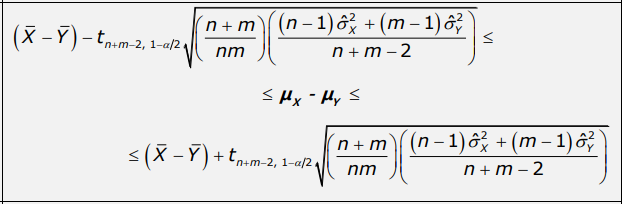

In [154]:
v_N_1 = N_1.var()
v_N_2 = N_2.var(ddof=1)
v_N_3 = N_3.var(ddof=1)
v_U_1 = U_1.var()
v_U_2 = U_2.var(ddof=1)
v_U_3 = U_3.var(ddof=1)
v_E_1 = Exp_1.var(ddof=1)
v_E_2 = Exp_2.var(ddof=1)
v_E_3 = Exp_3.var(ddof=1)

m_N_1 = N_1.mean()
m_N_2 = N_2.mean()
m_N_3 = N_2.mean()
m_U_1 = U_1.mean()
m_U_2 = U_2.mean()
m_U_3 = U_3.mean()
m_E_1 = Exp_1.mean()
m_E_2 = Exp_2.mean()
m_E_3 = Exp_3.mean()


z_crit = sts.norm.ppf(1 - alpha_1/2)

##### 90% интервалы #####

In [172]:
# N U 100

n = 100

(m_N_1 - m_U_1 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_N_1 + (n-1)*v_U_1) / (n-2))), m_N_1 - m_U_1 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_N_1 + (n-1)*v_U_1) / (n-2))))

(5.020269564818564, 7.388301553509722)

In [173]:
# N U 300

n = 300

(m_N_2 - m_U_2 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_N_2 + (n-1)*v_U_2) / (n-2))), m_N_2 - m_U_2 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_N_2 + (n-1)*v_U_2) / (n-2))))

(5.930678042823294, 7.345038809290019)

In [174]:
# N U 1000

n = 1000

(m_N_3 - m_U_3 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_N_3 + (n-1)*v_U_3) / (n-2))), m_N_3 - m_U_3 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_N_3 + (n-1)*v_U_3) / (n-2))))

(6.194992388053175, 6.964115649248808)

In [178]:
# N E 100

n = 100

(m_N_1 - m_E_1 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_N_1 + (n-1)*v_E_1) / (n-2))), m_N_1 - m_E_1 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_N_1 + (n-1)*v_E_1) / (n-2))))

(-2.1138878383454642, 6.234756140178883)

In [184]:
# N E 300

n = 300

(m_N_2 - m_E_2 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_N_2 + (n-1)*v_E_2) / (n-2))), m_N_2 - m_E_2 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_N_2 + (n-1)*v_E_2) / (n-2))))

(-2.669437496685977, 2.2869326754480825)

In [185]:
# N E 1000

n = 1000

(m_N_3 - m_E_3 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_N_3 + (n-1)*v_E_3) / (n-2))), m_N_3 - m_E_3 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_N_3 + (n-1)*v_E_3) / (n-2))))

(-1.6653382353303148, 1.2064396026433475)

In [181]:
# E U 100

n = 100

(m_E_1 - m_U_1 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_E_1 + (n-1)*v_U_1) / (n-2))), m_E_1 - m_U_1 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_E_1 + (n-1)*v_U_1) / (n-2))))

(-0.04818970769752706, 8.335892524192396)

In [182]:
# E U 300

n = 300

(m_E_2 - m_U_2 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_E_2 + (n-1)*v_U_2) / (n-2))), m_E_2 - m_U_2 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_E_2 + (n-1)*v_U_2) / (n-2))))

(4.351226985185011, 9.306994688166196)

In [183]:
# E U 1000

n = 1000

(m_E_3 - m_U_3 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_E_3 + (n-1)*v_U_3) / (n-2))), m_E_3 - m_U_3 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_E_3 + (n-1)*v_U_3) / (n-2))))

(5.371947637356775, 8.246059032632175)

##### 95% интервалы #####

In [186]:
z_crit = sts.norm.ppf(1 - alpha_2/2)
z_crit

1.959963984540054

In [187]:
# N U 100

n = 100

(m_N_1 - m_U_1 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_N_1 + (n-1)*v_U_1) / (n-2))), m_N_1 - m_U_1 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_N_1 + (n-1)*v_U_1) / (n-2))))

(4.793443482998553, 7.615127635329733)

In [189]:
# N U 300

n = 300

(m_N_2 - m_U_2 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_N_2 + (n-1)*v_U_2) / (n-2))), m_N_2 - m_U_2 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_N_2 + (n-1)*v_U_2) / (n-2))))

(5.795201025422481, 7.480515826690832)

In [190]:
# N U 1000

n = 1000

(m_N_3 - m_U_3 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_N_3 + (n-1)*v_U_3) / (n-2))), m_N_3 - m_U_3 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_N_3 + (n-1)*v_U_3) / (n-2))))

(6.121320572551198, 7.037787464750785)

In [191]:
# N E 100

n = 100

(m_N_1 - m_E_1 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_N_1 + (n-1)*v_E_1) / (n-2))), m_N_1 - m_E_1 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_N_1 + (n-1)*v_E_1) / (n-2))))

(-2.9135772898404033, 7.034445591673822)

In [192]:
# N E 300

n = 300

(m_N_2 - m_E_2 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_N_2 + (n-1)*v_E_2) / (n-2))), m_N_2 - m_E_2 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_N_2 + (n-1)*v_E_2) / (n-2))))

(-3.144192074142559, 2.7616872529046645)

In [193]:
# N E 1000

n = 1000

(m_N_3 - m_E_3 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_N_3 + (n-1)*v_E_3) / (n-2))), m_N_3 - m_E_3 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_N_3 + (n-1)*v_E_3) / (n-2))))

(-1.9404164935446986, 1.4815178608577313)

In [194]:
# E U 100

n = 100

(m_E_1 - m_U_1 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_E_1 + (n-1)*v_U_1) / (n-2))), m_E_1 - m_U_1 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_E_1 + (n-1)*v_U_1) / (n-2))))

(-0.8512736742141582, 9.138976490709027)

In [195]:
# E U 300

n = 300

(m_E_2 - m_U_2 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_E_2 + (n-1)*v_U_2) / (n-2))), m_E_2 - m_U_2 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_E_2 + (n-1)*v_U_2) / (n-2))))

(3.8765301162889627, 9.781691557062244)

In [196]:
# E U 1000

n = 1000

(m_E_3 - m_U_3 - z_crit * np.sqrt((2*n / (n**2)) * (((n-1)*v_E_3 + (n-1)*v_U_3) / (n-2))), m_E_3 - m_U_3 + z_crit * np.sqrt((2*n/(n**2)) * (((n-1)*v_E_3 + (n-1)*v_U_3) / (n-2))))

(5.0966458552787, 8.52136081471025)

#### Подпункт 3... ####

##### Генерация выборок #####

In [201]:
for i in range(len(U_1)):
    if U_1[i] < c_2 + ((c_1 / (c_1 + c_2))*c_3):
        U_1[i] = 0
    else:
        U_1[i] = 1

In [203]:
for i in range(len(U_2)):
    if U_2[i] < c_2 + ((c_1 / (c_1 + c_2))*c_3):
        U_2[i] = 0
    else:
        U_2[i] = 1

In [204]:
for i in range(len(U_3)):
    if U_3[i] < c_2 + ((c_1 / (c_1 + c_2))*c_3):
        U_3[i] = 0
    else:
        U_3[i] = 1

In [221]:
# Только потом дошло, что можно просто взять среднее... 

p_1 = U_1.sum() / len(U_1)
p_2 = U_2.sum() / len(U_2)
p_3 = U_3.sum() / len(U_3)

p_1, p_2, p_3

(0.4, 0.4166666666666667, 0.427)

вроде бы выборки и доли выглядят нормально, строить интервалы буду по следёющей формуле: <br>

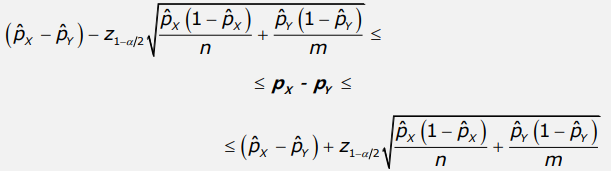

##### 90% интервалы #####

In [218]:
z_crit = sts.norm.ppf(1 - alpha_1/2)

In [222]:
# p_1, p_2, 100, 300

n = 100
m = 300

(p_1 - p_2 - z_crit * np.sqrt((p_1 * (1 - p_1) / n) + (p_2 * (1 - p_2) / m)), p_1 - p_2 + z_crit * np.sqrt((p_1 * (1 - p_1) / n) + (p_2 * (1 - p_2) / m)))

(-0.10986159954507936, 0.07652826621174603)

In [223]:
# p_1, p_3, 100, 1000

n = 100
m = 1000

(p_1 - p_3 - z_crit * np.sqrt((p_1 * (1 - p_1) / n) + (p_3 * (1 - p_3) / m)), p_1 - p_3 + z_crit * np.sqrt((p_1 * (1 - p_1) / n) + (p_3 * (1 - p_3) / m)))

(-0.11158884271750007, 0.05758884271750013)

In [224]:
# p_2, p_3, 300, 1000

n = 300
m = 1000

(p_2 - p_3 - z_crit * np.sqrt((p_2 * (1 - p_2) / n) + (p_3 * (1 - p_3) / m)), p_2 - p_3 + z_crit * np.sqrt((p_2 * (1 - p_2) / n) + (p_3 * (1 - p_3) / m)))

(-0.06375579346799798, 0.04308912680133136)

##### 95% интервалы #####

In [225]:
z_crit = sts.norm.ppf(1 - alpha_2/2)

In [227]:
# p_1, p_2, 100, 300

n = 100
m = 300

(p_1 - p_2 - z_crit * np.sqrt((p_1 * (1 - p_1) / n) + (p_2 * (1 - p_2) / m)), p_1 - p_2 + z_crit * np.sqrt((p_1 * (1 - p_1) / n) + (p_2 * (1 - p_2) / m)))

(-0.12771527852512815, 0.09438194519179482)

In [228]:
# p_1, p_3, 100, 1000

n = 100
m = 1000

(p_1 - p_3 - z_crit * np.sqrt((p_1 * (1 - p_1) / n) + (p_3 * (1 - p_3) / m)), p_1 - p_3 + z_crit * np.sqrt((p_1 * (1 - p_1) / n) + (p_3 * (1 - p_3) / m)))

(-0.12779382292970115, 0.0737938229297012)

In [229]:
# p_2, p_3, 300, 1000

n = 300
m = 1000

(p_2 - p_3 - z_crit * np.sqrt((p_2 * (1 - p_2) / n) + (p_3 * (1 - p_3) / m)), p_2 - p_3 + z_crit * np.sqrt((p_2 * (1 - p_2) / n) + (p_3 * (1 - p_3) / m)))

(-0.07399012085158138, 0.05332345418491477)

По проведённым опытам я вновь пришёл к выводам, полученным в 2.2, разностные доверительные интервалы тоже подвержены тенденции к увеличению точности с увеличением выборок, т.е. значений больше - интервал уже, а 95%, что логично, шире, чем 90% аналоги

## Задание 3 ##

### Пункт 1 ###

#### Подпункт 1 ####

In [248]:
n=100
norm_rv = sts.norm(loc=a_2, scale=np.sqrt(a_1))
N_list = []

for i in range(100):
    N = norm_rv.rvs(n)
    N_list.append(N)

Знаю про готовые функции и даже умею их использовать, но тут мне удобнее вручную написать следующую формулу: <br>

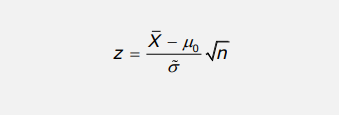

#### Подпункт 2 ####

In [254]:
# 1% уровень значимости

alpha = 0.01
z_crit = sts.norm.ppf(1 - alpha / 2)
ans_list_1 = []

for i in range(len(N_list)):
    z_obs = ((N_list[i].mean() - a_2) / np.sqrt(a_1)) * np.sqrt(n)
    if (z_obs > -z_crit) and (z_obs < z_crit):
        a = 1
        ans_list_1.append(a)
    else:
        a = 0
        ans_list_1.append(a)

'Доля верных ответов', np.array(ans_list_1).mean()

('Доля верных ответов', 0.97)

In [255]:
# 5% уровень значимости

alpha = 0.05
z_crit = sts.norm.ppf(1 - alpha / 2)
ans_list_2 = []

for i in range(len(N_list)):
    z_obs = ((N_list[i].mean() - a_2) / np.sqrt(a_1)) * np.sqrt(n)
    if (z_obs > -z_crit) and (z_obs < z_crit):
        a = 1
        ans_list_2.append(a)
    else:
        a = 0
        ans_list_2.append(a)

'Доля верных ответов', np.array(ans_list_2).mean()

('Доля верных ответов', 0.93)

In [263]:
# 10% уровень значимости

alpha = 0.1
z_crit = sts.norm.ppf(1 - alpha / 2)
ans_list_3 = []

for i in range(len(N_list)):
    z_obs = ((N_list[i].mean() - a_2) / np.sqrt(a_1)) * np.sqrt(n)
    if (z_obs > -z_crit) and (z_obs < z_crit):
        a = 1
        ans_list_3.append(a)
    else:
        a = 0
        ans_list_3.append(a)

'Доля верных ответов', np.array(ans_list_3).mean()

('Доля верных ответов', 0.84)

#### Подпункт 3 ####

Тут уже деваться некуда, использую т-статистику <br>

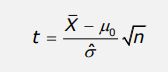

In [259]:
# 1% уровень значимости

alpha = 0.01
t_crit = sts.t.ppf(1 - alpha / 2, 99)
ans_list_12 = []

for i in range(len(N_list)):
    t_obs = ((N_list[i].mean() - a_2) / np.sqrt(N_list[i].var(ddof=1))) * np.sqrt(n)
    if (t_obs > -t_crit) and (t_obs < t_crit):
        a = 1
        ans_list_12.append(a)
    else:
        a = 0
        ans_list_12.append(a)

'Доля верных ответов', np.array(ans_list_12).mean()

('Доля верных ответов', 0.99)

In [260]:
# 5% уровень значимости

alpha = 0.05
t_crit = sts.t.ppf(1 - alpha / 2, 99)
ans_list_22 = []

for i in range(len(N_list)):
    t_obs = ((N_list[i].mean() - a_2) / np.sqrt(N_list[i].var(ddof=1))) * np.sqrt(n)
    if (t_obs > -t_crit) and (t_obs < t_crit):
        a = 1
        ans_list_22.append(a)
    else:
        a = 0
        ans_list_22.append(a)

'Доля верных ответов', np.array(ans_list_22).mean()

('Доля верных ответов', 0.94)

In [262]:
# 10% уровень значимости

alpha = 0.1
t_crit = sts.t.ppf(1 - alpha / 2, 99)
ans_list_32 = []

for i in range(len(N_list)):
    t_obs = ((N_list[i].mean() - a_2) / np.sqrt(N_list[i].var(ddof=1))) * np.sqrt(n)
    if (t_obs > -t_crit) and (t_obs < t_crit):
        a = 1
        ans_list_32.append(a)
    else:
        a = 0
        ans_list_32.append(a)

'Доля верных ответов', np.array(ans_list_32).mean()

('Доля верных ответов', 0.86)

В данной ситуации т-статистика оказалась точнее z-статистики, однако сравнивать их напрямую некорректно

### Пункт 2 ###

In [269]:
df = pd.read_csv('https://raw.githubusercontent.com/ExuberantSebastian/HW_MS/main/data/HW_MS_CSV.csv')

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 734 non-null    object 
 1   Crude oil, Dubai     734 non-null    float64
 2   Natural gas, Europe  734 non-null    float64
 3   Coffee, Arabica      734 non-null    float64
dtypes: float64(3), object(1)
memory usage: 23.1+ KB


In [272]:
df.head()

,date,"Crude oil, Dubai","Natural gas, Europe","Coffee, Arabica"
0,1960M01,1.63,0.404774,0.9409
1,1960M02,1.63,0.404774,0.9469
2,1960M03,1.63,0.404774,0.9281
3,1960M04,1.63,0.404774,0.9303
4,1960M05,1.63,0.404774,0.9200


In [296]:
df.tail()

,date,"Crude oil, Dubai","Natural gas, Europe","Coffee, Arabica"
729,2020M10,39.70,4.889590,3.352345
730,2020M11,42.58,4.835839,3.323024
731,2020M12,49.26,5.856106,3.479111
732,2021M01,54.16,7.268302,3.542383
733,2021M02,60.37,6.158507,3.657685


In [297]:
# Генерация нужных интервалов и значений

Oil_36 = df['Crude oil, Dubai'][733-36:733]
Oil_72 = df['Crude oil, Dubai'][733-72:733]
Oil_108 = df['Crude oil, Dubai'][733-108:733]
last_oil = df['Crude oil, Dubai'][733]

Gas_36 = df['Natural gas, Europe'][733-36:733]
Gas_72 = df['Natural gas, Europe'][733-72:733]
Gas_108 = df['Natural gas, Europe'][733-108:733]
last_gas = df['Natural gas, Europe'][733]

Coffee_36 = df['Coffee, Arabica'][733-36:733]
Coffee_72 = df['Coffee, Arabica'][733-72:733]
Coffee_108 = df['Coffee, Arabica'][733-108:733]
last_coffee = df['Coffee, Arabica'][733]

__Гипотезы о нефти__

In [284]:
alpha = 0.05
n = 36

t_crit = sts.t.ppf(1 - alpha / 2, 35)
t_obs = ((Oil_36.mean() - last_oil) / Oil_36.var(ddof=1)) * np.sqrt(n)

if (t_obs > -t_crit) and (t_obs < t_crit):
    print('Нет оснований отвергать Н0')
else:
    print('Н0 отвергается')

t_obs, (-t_crit, t_crit)

Нет оснований отвергать Н0


(-0.08001469462716156, (-2.0301079282503425, 2.0301079282503425))

In [289]:
alpha = 0.05
n = 72

t_crit = sts.t.ppf(1 - alpha / 2, 71)
t_obs = ((Oil_72.mean() - last_oil) / Oil_72.var(ddof=1)) * np.sqrt(n)

if (t_obs > -t_crit) and (t_obs < t_crit):
    print('Нет оснований отвергать Н0')
else:
    print('Н0 отвергается')

t_obs, (-t_crit, t_crit)

Нет оснований отвергать Н0


(-0.38078369118170635, (-1.993943367434504, 1.993943367434504))

In [290]:
alpha = 0.05
n = 108

t_crit = sts.t.ppf(1 - alpha / 2, 107)
t_obs = ((Oil_108.mean() - last_oil) / Oil_108.var(ddof=1)) * np.sqrt(n)

if (t_obs > -t_crit) and (t_obs < t_crit):
    print('Нет оснований отвергать Н0')
else:
    print('Н0 отвергается')

t_obs, (-t_crit, t_crit)

Нет оснований отвергать Н0


(0.13759606255078874, (-1.9823833701230174, 1.9823833701230174))

__Гипотезы о газе__

In [287]:
alpha = 0.05
n = 36

t_crit = sts.t.ppf(1 - alpha / 2, 35)
t_obs = ((Gas_36.mean() - last_gas) / Gas_36.var(ddof=1)) * np.sqrt(n)

if (t_obs > -t_crit) and (t_obs < t_crit):
    print('Нет оснований отвергать Н0')
else:
    print('Н0 отвергается')

t_obs, (-t_crit, t_crit)

Нет оснований отвергать Н0


(-1.1325220172024548, (-2.0301079282503425, 2.0301079282503425))

In [291]:
alpha = 0.05
n = 72

t_crit = sts.t.ppf(1 - alpha / 2, 71)
t_obs = ((Gas_72.mean() - last_gas) / Gas_72.var(ddof=1)) * np.sqrt(n)

if (t_obs > -t_crit) and (t_obs < t_crit):
    print('Нет оснований отвергать Н0')
else:
    print('Н0 отвергается')

t_obs, (-t_crit, t_crit)

Н0 отвергается


(-2.0071335092117284, (-1.993943367434504, 1.993943367434504))

In [292]:
alpha = 0.05
n = 108

t_crit = sts.t.ppf(1 - alpha / 2, 107)
t_obs = ((Gas_108.mean() - last_gas) / Gas_108.var(ddof=1)) * np.sqrt(n)

if (t_obs > -t_crit) and (t_obs < t_crit):
    print('Нет оснований отвергать Н0')
else:
    print('Н0 отвергается')

t_obs, (-t_crit, t_crit)

Нет оснований отвергать Н0


(1.2773228174734086, (-1.9823833701230174, 1.9823833701230174))

__Гипотезы о кофе__

In [298]:
alpha = 0.05
n = 36

t_crit = sts.t.ppf(1 - alpha / 2, 35)
t_obs = ((Coffee_36.mean() - last_coffee) / Coffee_36.var(ddof=1)) * np.sqrt(n)

if (t_obs > -t_crit) and (t_obs < t_crit):
    print('Нет оснований отвергать Н0')
else:
    print('Н0 отвергается')

t_obs, (-t_crit, t_crit)

Н0 отвергается


(-45.147459149419376, (-2.0301079282503425, 2.0301079282503425))

In [299]:
alpha = 0.05
n = 72

t_crit = sts.t.ppf(1 - alpha / 2, 71)
t_obs = ((Coffee_72.mean() - last_coffee) / Coffee_72.var(ddof=1)) * np.sqrt(n)

if (t_obs > -t_crit) and (t_obs < t_crit):
    print('Нет оснований отвергать Н0')
else:
    print('Н0 отвергается')

t_obs, (-t_crit, t_crit)

Н0 отвергается


(-29.87719575180791, (-1.993943367434504, 1.993943367434504))

In [300]:
alpha = 0.05
n = 108

t_crit = sts.t.ppf(1 - alpha / 2, 107)
t_obs = ((Coffee_108.mean() - last_coffee) / Coffee_108.var(ddof=1)) * np.sqrt(n)

if (t_obs > -t_crit) and (t_obs < t_crit):
    print('Нет оснований отвергать Н0')
else:
    print('Н0 отвергается')

t_obs, (-t_crit, t_crit)

Н0 отвергается


(-6.766923833493519, (-1.9823833701230174, 1.9823833701230174))

Странное дело, скорее всего в кофе попалось немало выбросов, давайте проверим!

In [304]:
Coffee_36.mean(), Coffee_72.mean(), Coffee_108.mean(), last_coffee

(3.056515787722222, 3.2559757202499995, 3.4510960095295165, 3.657685042)

Получившиеся значения можно объяснить провалом и последующим отскоком в цене в рассматриваемом периоде. Обвал создал выбросы, которые потянули за собой среднее, а последнее значение было реализовано уже после отскока, потому образовался большой ценовой гэп